# INF8111 - Fouille de données / Data Mining
## Été 2023 - TP3 - Fouille de réseaux sociaux / Mining of social networks
### Membres de l'équipe / Team members
    - SOUTTRE Matthieu (2239547) 1
    - MUDENGE Marco (2137307) 2


## Instructions de remise / Submission

Vous devez remettre dans la boîte de remise sur moodle:

1. ce fichier nommé TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Ce notebook être remis avant le **XX juin 2023 à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Partie 1: 10 points

Partie 2: 6 points

Partie 3: 4 points

Pour un total de 20 points.


---

## Submission

You must put back in the submission box on moodle:

1. this file renamed TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **June XXth 2023 à 23h55**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème
Part 1: 10 points

Part 2: 6 points

Part 3: 4 points

For a total of 20 points.


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de nos vies. Tout au long de sa,vie, chaque personne appartient à différentes communautés. Avec la récupération de ces informations par les différents réseaux sociaux, les data-analystes ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec de nombreux impacts, notamment sur la publicité et les systèmes de recommandation. 

### But
Le but de ce TP est de vous donner un aperçu de l'analyse de réseau social.

Dans la première partie, vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Dans la deuxième partie, vous trouverez les personnes avec le plus d'influence dans leur réseau social. 

Pour les deux parties, nous vous fournissons les CSV contenant les réseaux sociaux à analyser.

---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

In the first part, you will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

In the second part, you will find the people with the most influence in their social network.

For both parts, we provide you with the CSV containing the social networks to be analysed.

# 1. LPAm+ (10 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour regrouper les personnes dans des communautés selon leurs liens. 

## LPAm+
Dans cette partie, vous devez implémenter l'algorithme LPAm+ pour détecter les communautés parmi les personnages de l'univers cinématographique Marvel (MCU, en anglais). Vous devez utiliser les CSVs *nodes* et *edges* pour cela. 

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut fusionner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'il peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP. 

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser la librairie networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of the Marvel Cinematic Universe (MCU). You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [1]:
# vous pouvez bien sûr utiliser anaconda pour installer les packages

# !pip install --user numpy
# !pip install --user pandas
# !pip install --user matplotlib
# !pip install --user networkx

In [1]:
# vérifier si les libraries sont bien installés

import networkx
print('networkx: {}'.format(networkx.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

networkx: 3.1
matplotlib: 3.7.1


In [2]:
from itertools import combinations
import numpy as np
import networkx as nx
import random
import itertools
import math


random.seed(42)
np.random.seed(42)

class LPAmPlus:
    """
    Constructor
    """
    

    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """

        ## TODO
        self.graph = graph
        
        """
        labels gives all the communities present in the network
        """

        ## TODO         
        self.labels = []

        """
        Assign a label to each node
        """
        ## TODO
        for c, node in enumerate(list(self.graph.nodes)):
            self.graph.nodes[node]['label'] = c
            self.labels.append(c)

    """
    Term to optimize when replacing labels
    """

    def label_evaluation(self, current_node, new_label):
        
        ## TODO
        nodes = self.graph.nodes
        id_current_node = list(nodes).index(current_node) # index of the current node
        B = nx.linalg.modularity_matrix(self.graph) # compute the modularity matrix
        l_max = 0
        for i, node_i in enumerate(nodes):
            if node_i == current_node:
                continue
            l_max += B[i,id_current_node] * int(nodes[node_i]['label'] == new_label)
        return l_max

    """
    Function to choose the new label for a node
    """

    def update_label(self, current_node):
       
        ## TODO
        node_label = {}
        for label in self.labels:
            node_label.setdefault(label, self.label_evaluation(current_node,label))
        label_max = max(node_label, key = node_label.get)
        self.graph.nodes[current_node]['label'] = label_max


    """
    Function that calculates the current modularity of the network
    """

    def modularity(self):
        
        ## TODO
        B = nx.linalg.modularity_matrix(self.graph) # compute the modularity matrix
        m = self.graph.number_of_edges() # compute m
        Q = 0
        nodes = self.graph.nodes
        for i, node_i in enumerate(nodes):
            for j, node_j in enumerate(nodes):
                if nodes[node_i]['label'] == nodes[node_j]['label']: # if delta(u, v) = 1
                    Q = Q + B[i,j]
        Q = Q / (2 * m)
        return Q
    
    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self):
        
        ## TODO
        number_of_comunities = 5
        i = 0 # counter
        while (i < number_of_comunities):
            for k in self.graph.nodes:
                modularity = self.modularity()
                graph_copy = self.graph.copy()
                self.update_label(k)
                self.labels = list(dict.fromkeys(list(nx.get_node_attributes(self.graph, 'label').values())))
                if self.modularity() == modularity:
                    i = i + 1
                elif self.modularity() > modularity:
                    i = 0
                else:
                    self.graph = graph_copy
                    return

   
    """
    Function that find which communities to combine and combine them
    """
    #def merge_communities(self):
        
        ## TODO


    
    
    """
    Function that applies the LPAm+ algorithm on the network
    """

    #def find_communities(self):
        ## TODO

    

### 1.1 Dataset (1 point)

Nous vous avons fourni le fichier *`tp-marvel-dataset-subset.csv`* contenant l'ensemble des personnages de l'univers cinématographique Marvel. Vous devez maintenant créer un graphe reliant tous les personnages. Vous devez suivre les règles ci-dessous :

#### Mise en œuvre
1. Implémentez la fonction *`load_unweighted_network`*. Cette fonction retourne un graphe non orienté et non pondéré.
2. Chaque personnage est un nœud unique du graphe. Aucun personnage ne peut donc apparaître deux fois dans le graphe.
3. Tous les personnages d'un même film doivent être connectés.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un sous-ensemble de l'ensemble de données. Vous devriez obtenir un résultat semblable à celui-ci :

![titre](picture.png)

---
We have provided you with the a .CSV file, called *`tp-marvel-dataset-subset.csv`*, with all the characters from movies in the Marvel Cinematic Universe. You must now create a graph connecting all the characters. You should follow the rules below:

#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.
2. Each character must be a single node inside the graph. No character should appear twice in the graph. 
3. All characters in a same movie should be connected.

Use the function `test_load` to verify your implementation of the function. This test uses a subset of the whole dataset. You should obtain a result similar to this:

![title](picture.png)


In [3]:
import csv
import pandas as pd
import networkx as nx

def load_unweighted_network(source_csv):
    ## TODO
    df = pd.read_csv(source_csv, delimiter=";")
    network = nx.Graph()
    number_of_heroes = df.Hero_id.max()
    network.add_nodes_from(range(number_of_heroes))
    connections = list(df.groupby('Movie')['Hero_id'].apply(
        lambda x : list(combinations(x.values,2))).apply(
        pd.Series).stack().reset_index(level=0,name='Hero_id').Hero_id)
    network.add_edges_from(connections)
    return network

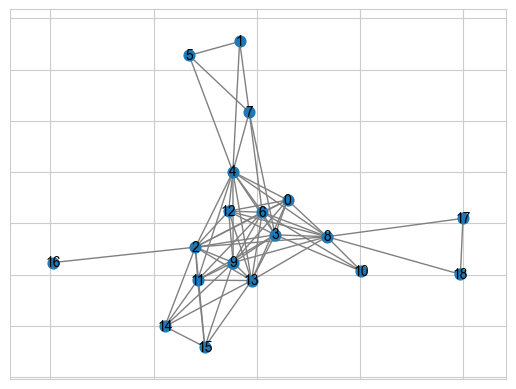

<Figure size 2000x2000 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

def test_load():
    network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    nx.draw_networkx(network, node_size=60, font_size=10, edge_color = 'gray', font_color='black')
    plt.figure(figsize=(20,20))
    plt.show()

test_load()

### 1.2  Modularité / Modularity (1 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: nombre d'arêtes
- l: étiquette d'un sommet
- u, v: sommets du réseau
- B: matrice de modularité (chaque élément vaut $A_{uv} - P_{uv}$)
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: symbole de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `nx.linalg.modularity_matrix` de networkx pour calculer la matrice B. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les `nodes` agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.060.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `nx.linalg.modularity_matrix` from networkx to calculate B. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.060.

In [5]:
def test_modularity():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in range(0, 19):
        lpam.graph.nodes[i]['label'] = 0 if i < 8 else 1
    print("Modularity: {:.3f}".format(lpam.modularity()))

test_modularity()

Modularity: 0.060


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (2 points)

Comme mentionné plus haut, l'algorithme est basé sur une optimisation de la modularité. Il vous est demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme a la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction met à jour la nouvelle étiquette pour un sommet. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label. 

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et modifie leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimum de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe avec la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.184 avec 5 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.184 with 5 communities.

In [6]:
def test_lpam():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

Modularity: 0.184
Communities: [12, 5, 14, 10, 18]


### 1.5 LPAm+ (2 points)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va réessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne puisse plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction évalue si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.204 et 3 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.204 and 3 communities.

In [7]:
def test_lpam_plus():
    social_network = load_unweighted_network("data/tp-marvel-dataset-subset.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

AttributeError: 'LPAmPlus' object has no attribute 'find_communities'

### 1.6 MCU dataset (2 points)

Exécutez votre algorithme sur l'ensemble de données de caractères MCU complet (*`tp-marvel-dataset.csv`*) et comparez ce que vous obtenez avec les communautés réelles. Ces communautés réelles se trouvent dans la colonne Affiliation du csv.

Commencez par calculer le RI (Rand index) de vos résultats. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n : nombre de nœuds
- TP : Vrai positif le nombre de paires d'éléments qui sont dans la même communauté dans vos résultats et dans la vérité terrain
- TN : Vrai négatif le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans la vérité terrain
- FP : Faux positif le nombre de paires d'éléments qui sont dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans la vérité terrain
- FN : Faux négatif le nombre de paires d'éléments qui sont dans des communautés différentes dans vos résultats mais qui sont dans la même communauté dans la vérité terrain

**N.B :** Ce qui compte ici, c'est la composition des communautés que vous avez trouvées, pas les noms. Un TP, c'est quand le nœud a et le nœud b sont tous les deux dans les mêmes communautés dans votre résultat et dans la vérité terrain.

Répondre aux questions suivantes. Ce sont des guides pour votre analyse.

- L'algorithme fonctionne-t-il bien ?
- Le manque de nombreuses communautés affecte-t-il les performances algorithmiques ?
- Comment le fait de connecter tous les personnages d'un film affecte-t-il les résultats ?
- Expliquez pourquoi vous avez obtenu ces résultats en analysant les communautés dans l'ensemble de données. Quelles particularités offrent de meilleurs résultats ou entravent l'algorithme ?

Vous pouvez faire les manipulations que vous souhaitez pour mieux présenter vos résultats et mieux étayer vos propos.

---

Run your algorithm over whole MCU characters dataset (*`tp-marvel-dataset.csv`*) and compare what you get and the real communities. The ground truth is found in the Affiliation column in the csv. 

Start by calculating the RI (Rand index) of your results. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well?
- Does the lack of many communities affect the algorithmic performance?
- How does the fact of connecting all characters in a movie affect the results?
- Explain why you obtained those results by analysing the communities in the dataset. Which particularities offer better results, or hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

In [ ]:
## Mettez votre code ici

## Insert your code here

#### Analyse / Analysis


In [ ]:
## Écrivez ici

## Write here

# 2. Social network analysis (6 points)

Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau, c'est-à-dire les personnes autour desquelles les personnes du réseau se regroupent.

Il y a des mesures qui permettent de connaître ces personnes : les mesures de centralité. **Vous devez implémenter ces métriques vous-mêmes. N'utilisez pas l'implémentation `networkx` pour le tp.** Utilisez le dataset Marvel complet. 

---

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use `networkx` implementation for the  tp.** Use the whole Marvel dataset. 



## 2.1 Centralité de degré / Degree centrality (2 points)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule selon la formule suivante $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

2. Affichez les 10 centralités les plus élevées pour l'ensemble de données MCU. À titre indicatif, la centralité la plus élevée devrait être de 0.48.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.
2. Show the highest 10 centralities for the MCU dataset. As a hint, the highest centrality should be 0.48.

In [8]:
def calculate_degree_centrality(social_network):
    ## TODO
    social_network = load_unweighted_network(social_network)
    n = len(list(social_network.nodes))
    for node in list(social_network.nodes):
        social_network.nodes[node]['Cd'] = social_network.degree[node] / (n + 1)
    return social_network

In [9]:
df_Cd = pd.DataFrame(dict(calculate_degree_centrality("data/tp-marvel-dataset.csv").nodes.data())).transpose()
df_Cd.sort_values("Cd", ascending=False).head(10)

,Cd
41,0.481268
139,0.423631
32,0.414986
226,0.409222
332,0.371758
134,0.368876
120,0.365994
286,0.357349
321,0.357349
257,0.351585


## 2.2 Centralité de proximité / Closeness centrality (2 points)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule avec la formule suivante $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

2. L'ensemble de données a deux composants connectés. Utilisez la fonction `nx.connected_components` pour obtenir chacun d'eux. Calculez la centralité de proximité pour chaque composante et expliquez vos résultats.

3. Affichez les 10 centralités les plus élevées pour le plus grand composant connexe. À titre indicatif, la centralité la plus élevée devrait être de 0.67.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

2. The dataset has two connected components. Use the function `nx.connected_components` to get each one of them. Calculate the closeness centrality for each component, and explain your results. 

3. Show the highest 10 centralities for the largest connected component. As a hint, the highest centrality should be 0.67.

In [10]:
import statistics
def calculate_closeness_centrality(social_network):
    ## TODO
    for node in list(social_network.nodes):
        l = list(nx.shortest_path(social_network, node).values())
        AvDist = sum(map(len, l))/float(len(l)) - 1 # remove 1 because start node counted in the path
        social_network.nodes[node]['Cp'] = 1 / AvDist
    return social_network

In [11]:
def get_connected_components(social_network):
    social_network = load_unweighted_network(social_network)
    [comp_1, comp_2] = list(nx.connected_components(social_network))
    comp_1_graph = nx.subgraph(social_network, comp_1)
    comp_2_graph = nx.subgraph(social_network, comp_2)
    return comp_1_graph, comp_2_graph

In [12]:
subgraph_0, subgraph_1 = get_connected_components("data/tp-marvel-dataset.csv")
print(f"The first component has {len(subgraph_0)} nodes whereas the second one has {len(subgraph_1)} nodes.")

The first component has 329 nodes whereas the second one has 17 nodes.


In [13]:
df_Cp = pd.DataFrame(dict(calculate_closeness_centrality(subgraph_0).nodes.data())).transpose()
df_Cp.sort_values("Cp", ascending=False).head(10)

,Cp
41,0.672802
139,0.646365
32,0.642578
226,0.640078
332,0.624288
134,0.623106
120,0.621928
321,0.618421
286,0.618421
284,0.616105


## 2.3 Centralité d'intermédiarité / Betweeness centrality (2 points)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule avec cette formule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: la proportion des chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i 

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

**NB**: Utilisez les fonctions `all_shortest_paths()` ou `shortest_path()` de Networkx pour calculer des chemins simples les plus courts du graphe.

2. L'ensemble de données a deux composants connectés. Utilisez la fonction `nx.connected_components` pour obtenir chacun d'eux. Calculez la centralité de proximité pour chaque composante et expliquez vos résultats.

3. Affichez les 10 centralités les plus élevées pour l'ensemble de données MCU. À titre indicatif, la centralité la plus élevée devrait être de 0.07.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the proportion of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

**NB**: Use the functions `all_shortest_paths()` or `shortest_path()` from Networkx to compute the shortest simple paths in the graph.

2. The dataset has two connected components. Use the function `nx.connected_components` to get each one of them. Calculate the closeness centrality for each component, and explain your results. 

3. Show the highest 10 centralities for the MCU dataset. As a hint, the highest centrality should be 0.07.

In [14]:
from math import factorial

def calculate_betweenness_centrality(social_network):
    ## TODO
    # social_network = load_unweighted_network(social_network)
    n = len(list(social_network.nodes))
    # s = n*[0]

    for i in list(social_network.nodes):
        social_network.nodes[i]['Ci'] = 0

    for j in list(social_network.nodes):
        for k in list(social_network.nodes):
            if (j < k):
                l = list(nx.all_shortest_paths(social_network, j, k))
                t = len(l)
                for i in list(social_network.nodes):
                    if (i != j) and (i != k):
                        social_network.nodes[i]['Ci']+=sum(l, []).count(i) / t
                        #print(sum(l, []).count(i) / t)
            #print(j, k)

    for i in list(social_network.nodes):
        social_network.nodes[i]['Ci'] /= (factorial(n-1) / (2 * factorial(n-1-2)))

    return social_network

In [15]:
l = list(nx.all_shortest_paths(subgraph_0, 0, 1))
s=sum(l, []).count(139)
t=len(l)
l, s, t

([[0, 139, 1], [0, 259, 1]], 1, 2)

In [16]:
#df_Ci = pd.DataFrame(dict(calculate_betweenness_centrality(subgraph_0).nodes.data())).transpose()
df_Ci = pd.read_csv("data/Ci_big_comp.csv", index_col=0)
df_Ci.sort_values("Ci", ascending=False)

,Ci
41,0.073788
32,0.059036
332,0.049504
139,0.040054
134,0.038428
...,...
155,0.000000
156,0.000000
158,0.000000
159,0.000000


In [17]:
# df_Ci['Ci'].to_csv("data/Ci_big_comp.csv", index=True)

In [18]:
%%time
df_Ci_2 = pd.DataFrame(dict(calculate_betweenness_centrality(subgraph_1).nodes.data())).transpose()
df_Ci_2.sort_values("Ci", ascending=False)

CPU times: total: 15.6 ms
Wall time: 31.2 ms


,Ci
33,0.0
269,0.0
285,0.0
282,0.0
239,0.0
16,0.0
79,0.0
301,0.0
236,0.0
191,0.0


# 3. Méchants MCU/MCU Villains (4 points)

L'univers cinématographique Marvel est connu pour avoir des méchants très notables. Nous vous demandons de construire un modèle pour suivre ces méchants. Vos fonctionnalités doivent être chaque film dans lequel les personnages ont été et les mesures de centralité calculées auparavant.

---

The Marvel Cinematic Universe is known to have very notable villains. We ask you to build a model to track those villains. Your features should be each movie that the characters have been in, and the centrality measures calculated before. 

## 3.1. Création du ensemble de données/Creating the dataset (2 points)

À partir de la liste des films fournis, créez des features à partir de la colonne `Movie` afin d'entraîner votre jeu de données, et fusionner ces valeurs avec les centralités, pour chaque personnage. Utilisez la méthode de votre choix dans ce processus.

Les centralités étant très variables, mieux vaut normaliser chaque mesure. Sélectionnez une méthode de votre choix pour ramener toutes les mesures à une seule échelle.

Utilisez le fichier .CSV *`tp-marvel-villains.csv`* comme principale source d'indication si un personnage est un méchant. Fusionnez ce fichier dans l'ensemble de données global en tant qu'étiquette Mechant (la feature `y`).

---

From the list of movies given, create features from the column `Movie` so as to train your dataset, and merge these values ​​with the centralities, for each character.. Use any method of your choice in this process.

As the centralities vary greatly, it is better to normalize each measure. Select a method of your choice to bring all of the measures to a single scale.  

Use the .CSV file *`tp-marvel-villains.csv`* as the main source of indication whether a character is a villain. Merge this file into the overall dataset as the Villain label (the `y` feature).

In [19]:
import matplotlib.pyplot as plt

In [20]:
# Load datasets
marvel_data = pd.read_csv("data/tp-marvel-dataset.csv", sep=';')
marvel_villains = pd.read_csv("data/tp-marvel-villains.csv", sep=',', index_col=0)

In [21]:
# One-hot encoding for the Movie columns
one_hot = pd.get_dummies(marvel_data['Movie'])
marvel_data = marvel_data.join(one_hot) # one hot encoding for affiliation too?
marvel_data.drop(columns=['Movie', 'Affiliation'], inplace=True)

In [22]:
# Group by to have one row per hero
marvel_data = marvel_data.groupby(by=['Hero_id'], as_index=False).sum()

In [23]:
# Adding centrality measures
df_Ci_tot = pd.concat([df_Ci, df_Ci_2])
marvel_data = pd.merge(left=marvel_data, right=df_Ci_tot, left_on='Hero_id', right_index=True)
marvel_data = pd.merge(left=marvel_data, right=df_Cd, left_on='Hero_id', right_index=True)
marvel_data = pd.merge(left=marvel_data, right=df_Cp, left_on='Hero_id', right_index=True)

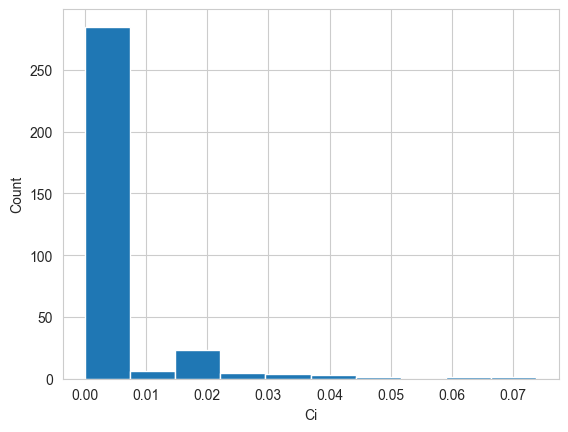

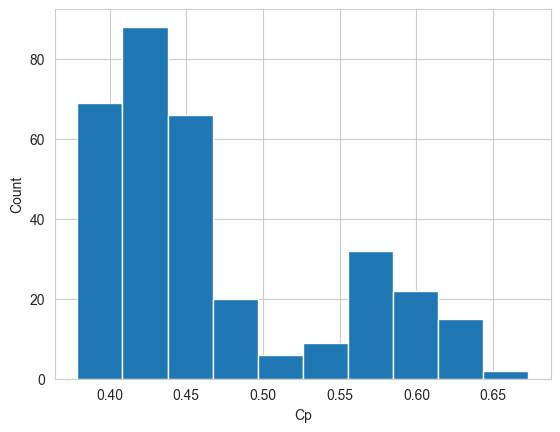

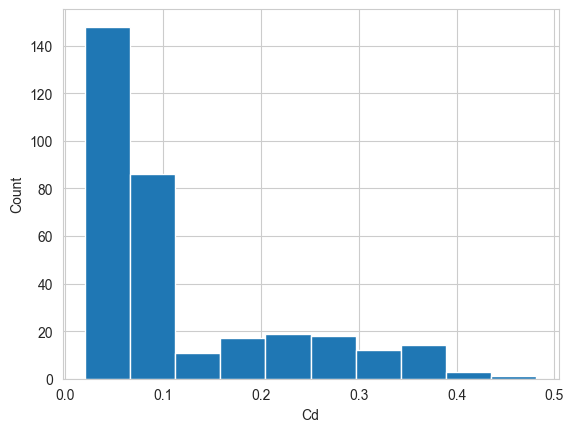

In [24]:
# Plotting the distributions to know which normalization process to choose
for feature in ["Ci", "Cp", "Cd"]:
    plt.hist(marvel_data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

The distribution are asymmetric thus we can use the standardisation process.

In [25]:
# Standardising the centrality metrics
for feature in ['Ci', 'Cp', 'Cd']:
    marvel_data[feature] = (marvel_data[feature] - marvel_data[feature].mean())/marvel_data[feature].std()

In [26]:
# Adding whether the character is a villain or not
villains_list = list(marvel_villains.Villain)
marvel_data['y'] = marvel_data.apply(lambda row: row.Hero_name in villains_list, axis=1)

In [27]:
marvel_data.head()

,Hero_id,Hero_name,Ant-Man,Ant-Man and the Wasp,Ant-Man and the Wasp: Quantumania,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Black Panther: Wakanda Forever,...,Spider-Man: No Way Home,The Incredible Hulk,Thor,Thor: Love and Thunder,Thor: Ragnarok,Thor: The Dark World,Ci,Cd,Cp,y
0,0,Aaron Davis,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.392526,-0.204551,-0.342915,False
1,1,AbominationAbomination,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,-0.297064,-0.529231,-0.293740,False
2,2,Abraham,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.392526,-0.204551,-0.342915,False
3,3,Abraham Erskine,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.392526,-0.735846,-0.438924,False
4,4,Agent 13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.392526,-0.617780,-0.184402,False


## 3.2. Construire le modèle/Building the model (2 points)


Maintenant, utilisez votre créativité pour construire un modèle pour prédire les méchants dans l'ensemble de données, à partir des fonctionnalités que vous avez créées. Voici quelques points pour vous guider :

1. Des démonstrations graphiques seront appréciées. Ne vous contentez pas de prédire vos données, affichez vos valeurs de manière agréable.
2. Expliquez vos résultats. L'ajout des fonctionnalités de centralité aide-t-il votre modèle d'une manière ou d'une autre? Les films aident-ils votre modèle? Si vous ne deviez garder qu'un seul des deux sous-ensembles, lequel garderiez-vous?

---

Now, use your creativity to build a model to predict the villains in the dataset, from the features that you have created. Here are some points to guide you:

1. Graphical demonstrations will be appreciated. Do not just predict your data, show your values in a pleasant way. 
2. Explain your results. Does the addition of the centrality features help your model somehow? Do the movies help your model? If you had to keep just one of the two subsets, which one would you keep?

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
import seaborn as sns

In [29]:
nb_villains = marvel_villains.shape[0]
nb_char = marvel_data.shape[0]
print(f'There are only {nb_villains} villains among our {nb_char} characters. Thus, the data set is very unbalanced.')

There are only 38 villains among our 329 characters. Thus, the data set is very unbalanced.


There are different solutions to handle unbalanced datasets. A first solution would be to remove a lot of observations (i.e., heroes) to have the same number of heroes and villains. However, the overall dataset would thus be very small (less than 100 points). Consequently, we can give more weight to villains in order to balance the dataset.

In [30]:
# Weight of villains set such that the sum of weights of heroes and villains are the same
weight_villains = (nb_char - nb_villains) / nb_villains

In [39]:
# Defining the training and testing sets, with a 15% train-test split
X = marvel_data.iloc[:, 2:-1]
y = marvel_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [40]:
y_weight = y_train.apply(lambda x: 1 if x == False else weight_villains)

In [41]:
# Selection of better hyper-parameters
n_list = [20, 50, 100, 200, 300]
d_list = [5, 10, 15, 20, 30]
res = []
for n in n_list:
    for d in d_list:
        # Train random forest classifier
        clf = RandomForestClassifier(n_estimators=n, max_depth=d)
        clf.fit(X_train, y_train, y_weight)
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        res.append([n, d, f1])

<Axes: xlabel='max_depth', ylabel='n_estimators'>

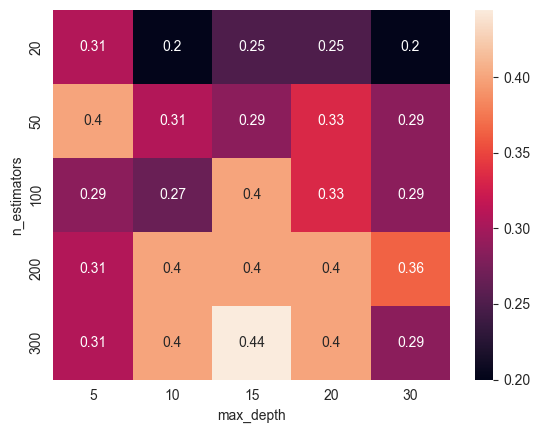

In [42]:
res_hyperparameters = pd.DataFrame(res, columns=['n_estimators', 'max_depth', 'f1'])
res_hyperparameters = pd.pivot_table(res_hyperparameters, values = 'f1', index=['n_estimators'], columns=['max_depth'])
sns.heatmap(res_hyperparameters, annot=True)

In [43]:
n = 100
d = 15

In [44]:
clf = RandomForestClassifier(n_estimators=n, max_depth=d)
clf.fit(X_train, y_train, y_weight)
y_pred = clf.predict(X_test)

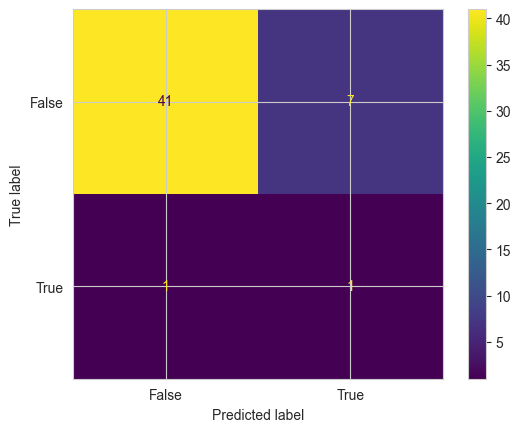

In [46]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Now we want to compare which features are the most useful for the classification between the movies and the centrality metrics. Thus, we will train two different classifiers, one based on movies and the other based on centrality metrics, and then compare their performances.

In [47]:
X_train_movies = X_train.iloc[:, :-3]
X_train_centrality = X_train.iloc[:, -3:]
X_test_movies = X_test.iloc[:, :-3]
X_test_centrality = X_test.iloc[:, -3:]

In [50]:
clf.fit(X_train_movies, y_train, y_weight)
y_pred_movies = clf.predict(X_test_movies)
f1_score(y_test, y_pred_movies)

0.33333333333333337

In [51]:
clf.fit(X_train_centrality, y_train, y_weight)
y_pred_centrality = clf.predict(X_test_centrality)
f1_score(y_test, y_pred_centrality)

0.16666666666666669